___
# <font color= #d4b1e6> **Proyecto 1: An√°lisis de Sentimientos** </font>
- <Strong> Nombre de los integrantes: </Strong>  <font color="blue">`Sarah Luc√≠a Beltr√°n, Priscila Cervantes Ram√≠rez & M√≥nica Ibarra Herrera` </font>
- <Strong> Materia: </Strong>  <font color="blue">`Miner√≠a de Textos` </font>
___

A continuaci√≥n se trabajar√° con un dataset que contiene rese√±as de pel√≠culas que est√°n etiquetadas como positivas y negativas.

En este proyecto se implementar√°n y comparar√°n modelos basados en n-grams (unigramas, bigramas y trigramas) enfocados en la clasificaci√≥n de texto. El objetivo es evaluar c√≥mo los diferentes tama√±os de n-gramas influyen en el desempe√±o de los algoritmos que se emplear√°n. 

Los modelos que se incluir√°n son los siguientes:
- Regresi√≥n Log√≠stica 
- Naive Bayes
- SVM

Para cada uno de los modelos mencionados anteriormente se obtendr√°n diferentes m√©tricas como Accuracy, Precision, Recall y F1-Score.

Se har√°n evaluaciones y se determinar√° cu√°l fue el modelo con el mejor desempe√±o, as√≠ como se revisar√°n algunos errores que hicieron los modelos para identificar por qu√© predijo mal, ya sea porque la rese√±a era de sarcasmo, negaci√≥n, etc.

### <font color= #d4b1e6> **Librer√≠as a utilizar** </font>

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score,
    precision_recall_fscore_support,
    classification_report,
    confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns
import random

### <font color= #d4b1e6> **Importaci√≥n de los datos** </font>

In [3]:
df = pd.read_csv('IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

*Visualizar que no haya valores nulos*

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


### <font color= #d4b1e6> **Divisi√≥n train/test** </font>

In [5]:
train_df, test_df = train_test_split(df, test_size=0.5, random_state=42, stratify=df['sentiment'])

print("Tama√±o train:", len(train_df))
print("Tama√±o test:", len(test_df))


Tama√±o train: 25000
Tama√±o test: 25000


Se usar√°n el 50% es decir 25,000 rese√±as para entrenar a los modelos y las rese√±as restantes, se usar√°n para probar su rendimiento.

### <font color= #d4b1e6> **Pre-Procesamiento** </font>

In [6]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cesar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Se utiliz√≥ la librer√≠a NLTK (Natural Language Toolkit) para realizar la tokenizaci√≥n del texto. Para ello fue necesario descargar los recursos *punkt*, *punkt_tab* y *stopwords*.

- *punkt* permite dividir de manera autom√°tica un texto en oraciones y palabras (tokens). 

- *punkt_tab* contiene informaci√≥n extra para que funcione de manera correcta el tokenizador.

- *stopwords* que contiene un listado de palabras muy frecuentes en el idioma (como the, is, and) que suelen eliminarse por no aportar valor al analizar texto.

De esta forma, se asegura que cada rese√±a se transforme en una secuencia de palabras significativas antes de construir representaciones con n-gramas.

*Limpieza de rese√±as*

In [7]:
STOPWORDS = set(stopwords.words("english"))
PUNCT_TABLE = str.maketrans("", "", string.punctuation)

- *STOPWORDS* importa una lista de stopwords en ingl√©s desde NLTK y las convierte en un conjunto para que las b√∫squedas sean m√°s r√°pidas cuando se filtre texto.
- *PUNCT_TABLE* crea una tabla de traducci√≥n que sirve para eliminar todos los signos de puntuaci√≥n, limpia el texto quitando las puntuaciones.

In [8]:
def preprocess_text(text, remove_stopwords=False):
    # Min√∫sculas
    text = text.lower()
    # Eliminar HTML
    text = re.sub(r"<.*?>", " ", text)
    # Tokenizar
    tokens = word_tokenize(text)
    # Eliminar tokens que no son alfanum√©ricos
    tokens = [t for t in tokens if any(c.isalnum() for c in t)]
    # Eliminar stopwords si se requiere
    if remove_stopwords:
        tokens = [t for t in tokens if t not in STOPWORDS]
    return " ".join(tokens)

# Aplicamos a train y test
train_df["clean_review"] = train_df["review"].apply(lambda x: preprocess_text(x, remove_stopwords=False))
test_df["clean_review"] = test_df["review"].apply(lambda x: preprocess_text(x, remove_stopwords=False))

train_df.head()

review sentiment  \
3055   Trio's vignettes were insightful and quite enj...  positive   
47326  I had never heard of this one before the owner...  negative   
48869  This is an excellent but hard to find trippy W...  positive   
48623  I am a huge fan of big, loud, trashy, complete...  positive   
39657  Easily Lucio Fulci's most respected film, "Don...  positive   

                                            clean_review  
3055   trio 's vignettes were insightful and quite en...  
47326  i had never heard of this one before the owner...  
48869  this is an excellent but hard to find trippy w...  
48623  i am a huge fan of big loud trashy completely ...  
39657  easily lucio fulci 's most respected film do n...

Se implementa una funci√≥n de preprocesamiento de texto que:

1) Convierte todo a min√∫sculas.

2) Elimina etiquetas HTML.

3) Tokeniza las rese√±as en palabras individuales.

4) Filtra tokens que no son letras o n√∫meros como signos de puntuaci√≥n

5) Opcionalmente elimina stopwords.

Se decidi√≥ no eliminar las stopwords durante el preprocesamiento, ya que en an√°lisis de sentimientos estas palabras pueden cambiar el significado de una oraci√≥n. Palabras como ‚Äònot‚Äô, ‚Äònever‚Äô o ‚Äòdon‚Äôt‚Äô son esenciales para que el modelo identifique correctamente si la rese√±a es positiva o negativa. 

De esta manera, se obtiene una columna clean_review con texto m√°s limpio y normalizado, que facilita el posterior an√°lisis y entrenamiento del modelo de clasificaci√≥n.

*Extracci√≥n de caracter√≠sticas*

In [9]:
# Definir el vectorizador con unigramas, bigramas y trigramas
vectorizer = CountVectorizer(ngram_range=(1,3), max_features=50000) # max_features: limita vocabulario para no explotar la RAM

#  Ajustar al train y transformar
X_train = vectorizer.fit_transform(train_df["clean_review"])
X_test = vectorizer.transform(test_df["clean_review"])

y_train = train_df["sentiment"]
y_test = test_df["sentiment"]

print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (25000, 50000)
Shape X_test: (25000, 50000)


Para representar las rese√±as se utiliz√≥ un CountVectorizer de Scikit-learn para extraer unigramas, bigramas y trigramas. Esto significa que cada rese√±a se transforma en un vector que refleja la frecuencia de palabras individuales y combinaciones de dos o tres palabras consecutivas. Se limit√≥ el vocabulario a 50,000 caracter√≠sticas para reducir el consumo de memoria.

El vectorizador se ajusta al conjunto de entrenamiento y luego se aplica al conjunto de prueba usando el mismo vocabulario aprendido, asegurando que la evaluaci√≥n sea consistente. Las etiquetas de sentimiento se almacenan por separado en y_train y y_test, y las dimensiones de las matrices resultantes reflejan el n√∫mero de rese√±as y la cantidad de n-gramas considerados.

### <font color= #d4b1e6> **Entrenamiento de Modelos** </font> 

#### <font color= #96d9cf> **Regresi√≥n Log√≠stica** </font> 

In [10]:
logreg = LogisticRegression(max_iter=1000, solver="saga")
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Logistic Regression
Accuracy: 0.90108
              precision    recall  f1-score   support

    negative       0.91      0.90      0.90     12500
    positive       0.90      0.91      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



*Explicaci√≥n de hiperpar√°metros*

Para entrenar el modelo de Regresi√≥n Log√≠stica se utiliz√≥ LogisticRegression de Scikit-learn con los hiperpar√°metros max_iter=1000 y solver="saga".

- *max_iter* de 1000 para asegurar que el algoritmo converja, dado el tama√±o y la alta dimensionalidad de los datos de n-grams.

- *solver="saga"* fue elegido por su eficiencia con matrices dispersas y por su capacidad de manejar regularizaci√≥n L1 y L2, caracter√≠sticas √∫tiles para textos con muchas caracter√≠sticas.

#### <font color= #96d9cf> **Naive Bayes** </font>

In [11]:
nb = MultinomialNB(alpha=0.5)
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
print("Naive Bayes")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes
Accuracy: 0.86768
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87     12500
    positive       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



Se entren√≥ un modelo Naive Bayes multinomial para clasificar las rese√±as en positivas o negativas. Este modelo es adecuado para datos de conteo, como los vectores de n-grams, ya que estima la probabilidad de cada palabra dado el sentimiento de la rese√±a.

#### <font color= #96d9cf> **SVM** </font>

In [12]:
svm = LinearSVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

c:\Users\cesar\anaconda3\envs\iteso\lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


SVM
Accuracy: 0.88436
              precision    recall  f1-score   support

    negative       0.89      0.88      0.88     12500
    positive       0.88      0.89      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



### <font color= #d4b1e6> **Evaluaci√≥n** </font> 

In [13]:
def plot_confusion(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative"])
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["positive", "negative"],
                yticklabels=["positive", "negative"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

#### <font color= #96d9cf> **Regresi√≥n Log√≠stica** </font> 

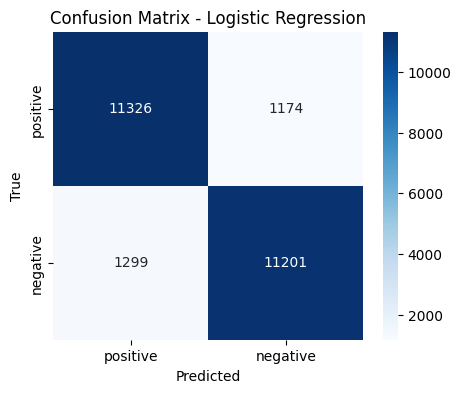

In [14]:
plot_confusion(y_test, y_pred_logreg, "Confusion Matrix - Logistic Regression")

#### <font color= #96d9cf> **Naive Bayes** </font>

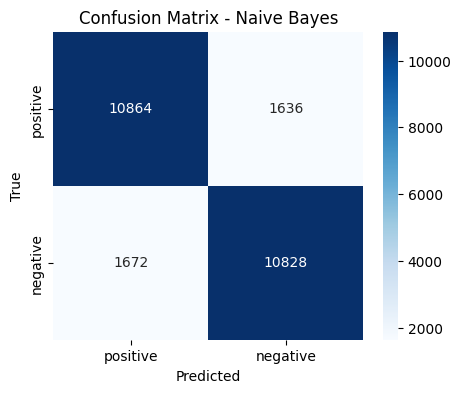

In [15]:
plot_confusion(y_test, y_pred_nb, "Confusion Matrix - Naive Bayes")


#### <font color= #96d9cf> **SVM** </font>

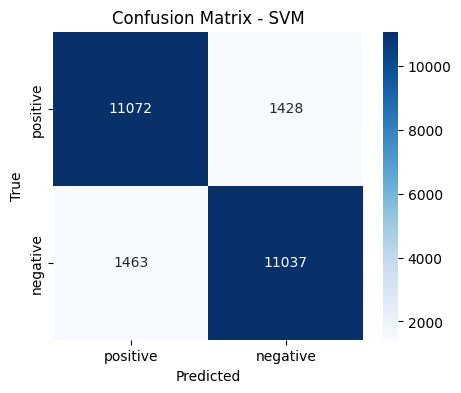

In [16]:
plot_confusion(y_test, y_pred_svm, "Confusion Matrix - SVM")


Modelo: LogisticRegression
Accuracy: 0.9011
Macro - Precision: 0.9011  Recall: 0.9011  F1: 0.9011
Weighted - Precision: 0.9011  Recall: 0.9011  F1: 0.9011

Per-class (positive / negative):
 Precision: 0.8971 / 0.9051
 Recall:    0.9061 / 0.8961
 F1-score:  0.9016 / 0.9006

Classification report:

              precision    recall  f1-score   support

    positive       0.90      0.91      0.90     12500
    negative       0.91      0.90      0.90     12500

    accuracy                           0.90     25000
   macro avg       0.90      0.90      0.90     25000
weighted avg       0.90      0.90      0.90     25000



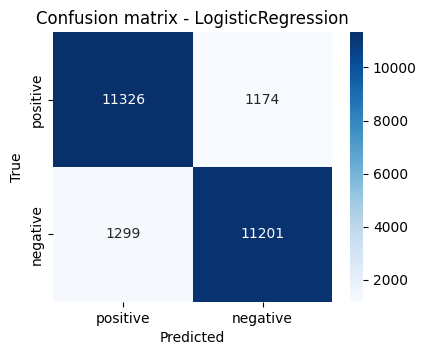


Modelo: MultinomialNB
Accuracy: 0.8677
Macro - Precision: 0.8677  Recall: 0.8677  F1: 0.8677
Weighted - Precision: 0.8677  Recall: 0.8677  F1: 0.8677

Per-class (positive / negative):
 Precision: 0.8666 / 0.8687
 Recall:    0.8691 / 0.8662
 F1-score:  0.8679 / 0.8675

Classification report:

              precision    recall  f1-score   support

    positive       0.87      0.87      0.87     12500
    negative       0.87      0.87      0.87     12500

    accuracy                           0.87     25000
   macro avg       0.87      0.87      0.87     25000
weighted avg       0.87      0.87      0.87     25000



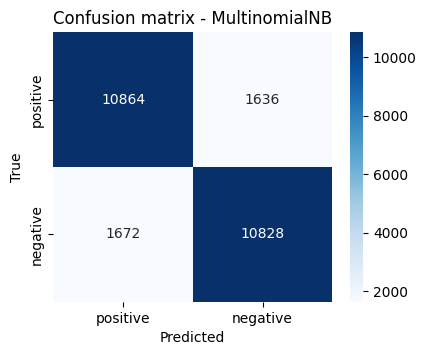


Modelo: LinearSVC
Accuracy: 0.8844
Macro - Precision: 0.8844  Recall: 0.8844  F1: 0.8844
Weighted - Precision: 0.8844  Recall: 0.8844  F1: 0.8844

Per-class (positive / negative):
 Precision: 0.8833 / 0.8854
 Recall:    0.8858 / 0.8830
 F1-score:  0.8845 / 0.8842

Classification report:

              precision    recall  f1-score   support

    positive       0.88      0.89      0.88     12500
    negative       0.89      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



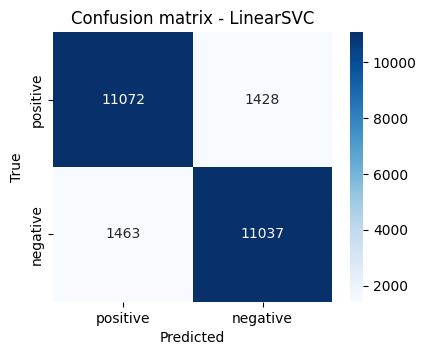

accuracy  precision_macro  recall_macro  f1_macro  \
model                                                                   
LogisticRegression    0.9011           0.9011        0.9011    0.9011   
MultinomialNB         0.8677           0.8677        0.8677    0.8677   
LinearSVC             0.8844           0.8844        0.8844    0.8844   

                    precision_weighted  recall_weighted  f1_weighted  \
model                                                                  
LogisticRegression              0.9011           0.9011       0.9011   
MultinomialNB                   0.8677           0.8677       0.8677   
LinearSVC                       0.8844           0.8844       0.8844   

                    pos_precision  pos_recall  pos_f1  neg_precision  \
model                                                                  
LogisticRegression         0.8971      0.9061  0.9016         0.9051   
MultinomialNB              0.8666      0.8691  0.8679         0.8687   
LinearSVC                  0.8833      0.8858  0.8845         0.8854   

                    neg_recall  neg_f1  
model                                   
LogisticRegression      0.8961  0.9006  
MultinomialNB           0.8662  0.8675  
LinearSVC               0.8830  0.8842

In [17]:

# Aseg√∫rate de que y_test y las predicciones existen
models_preds = {
    "LogisticRegression": y_pred_logreg,
    "MultinomialNB": y_pred_nb,
    "LinearSVC": y_pred_svm
}

summary_rows = []

def print_cm(y_true, y_pred, title):
    labels_order = ["positive", "negative"]  # ajusta si tus labels son otras
    cm = confusion_matrix(y_true, y_pred, labels=labels_order)
    plt.figure(figsize=(4.5,3.5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels_order, yticklabels=labels_order)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title(title)
    plt.show()

for name, y_pred in models_preds.items():
    # accuracy
    acc = accuracy_score(y_test, y_pred)
    # macro and weighted precision/recall/f1
    prec_macro, rec_macro, f1_macro, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
    prec_weight, rec_weight, f1_weight, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    # per-class metrics (order: positive, negative)
    per_prec, per_rec, per_f1, support = precision_recall_fscore_support(y_test, y_pred, labels=["positive","negative"])
    pos_prec, neg_prec = per_prec[0], per_prec[1]
    pos_rec, neg_rec = per_rec[0], per_rec[1]
    pos_f1,  neg_f1  = per_f1[0], per_f1[1]

    # print human-friendly report
    print("\n" + "="*60)
    print(f"Modelo: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Macro - Precision: {prec_macro:.4f}  Recall: {rec_macro:.4f}  F1: {f1_macro:.4f}")
    print(f"Weighted - Precision: {prec_weight:.4f}  Recall: {rec_weight:.4f}  F1: {f1_weight:.4f}")
    print("\nPer-class (positive / negative):")
    print(f" Precision: {pos_prec:.4f} / {neg_prec:.4f}")
    print(f" Recall:    {pos_rec:.4f} / {neg_rec:.4f}")
    print(f" F1-score:  {pos_f1:.4f} / {neg_f1:.4f}")
    print("\nClassification report:\n")
    print(classification_report(y_test, y_pred, labels=["positive","negative"]))
    print("="*60)

    # add to summary table
    summary_rows.append({
        "model": name,
        "accuracy": acc,
        "precision_macro": prec_macro,
        "recall_macro": rec_macro,
        "f1_macro": f1_macro,
        "precision_weighted": prec_weight,
        "recall_weighted": rec_weight,
        "f1_weighted": f1_weight,
        "pos_precision": pos_prec,
        "pos_recall": pos_rec,
        "pos_f1": pos_f1,
        "neg_precision": neg_prec,
        "neg_recall": neg_rec,
        "neg_f1": neg_f1
    })

    # show confusion matrix for this model
    print_cm(y_test, y_pred, f"Confusion matrix - {name}")

# show summary dataframe
summary_df = pd.DataFrame(summary_rows).set_index("model")
display(summary_df.round(4))


### <font color= #d4b1e6> **An√°lisis de Error** </font> 

In [18]:
# Escogemos un modelo para analizar (ej. Logistic Regression)
y_pred = y_pred_logreg  

# Encuentra √≠ndices de errores
errores_idx = [i for i, (y_true, y_hat) in enumerate(zip(y_test, y_pred)) if y_true != y_hat]

print("Total errores:", len(errores_idx))

# Muestra algunos ejemplos al azar usando el texto original
for i in random.sample(errores_idx, 5):
    print("="*80)
    print("üîπ Review original:")
    print(test_df.iloc[i]["review"])   # aqu√≠ usamos test_df, no X_test
    print("‚úÖ Sentiment real:", test_df.iloc[i]["sentiment"])
    print("‚ùå Predicci√≥n modelo:", y_pred[i])

Total errores: 2473
üîπ Review original:
Ah, here it is! A movie, which is said by people to remind me of the epic "Trainspotting". OUCH, was I a fool to believe that, and OUCH, how my buttocks hurt after having forced myself to watch this c**p from beginning to end. After the first 10-15 minutes I just wanted it all to end, or at least they could've put some nudity or action or cool acid house music into it to make it worth the time... But no, when I was through with it, i put it into my CD shelf and I hope I will never have to pick it out again just to show it to some friend who is so anxious to see it that he/she don't want to listen to my warnings.
‚úÖ Sentiment real: negative
‚ùå Predicci√≥n modelo: positive
üîπ Review original:
In this early Fulci work the director shows his most mainstream side as well as a talent for compelling storytelling and more than reasonable elucidation for the genre. Personally I think he has been unfairly maligned throughout his career as an aesthete